In [825]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [826]:
# Plot the model data with colored labels
def plotData(data, labels,names,col1,col2,labelsType):
    #plot the titles
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(names[col1])
    plt.ylabel(names[col2])
    # plot the data with different color for every label and size of 50 pixels
    myPlot = plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    plt.legend(handles=myPlot.legend_elements()[0], labels=[1,2,3])
    plt.show()

In [827]:
Iris = load_iris()
data = Iris.data[:, 2:] # petal length and width
trueLabels = Iris.target
featureNames = Iris.feature_names[2:]

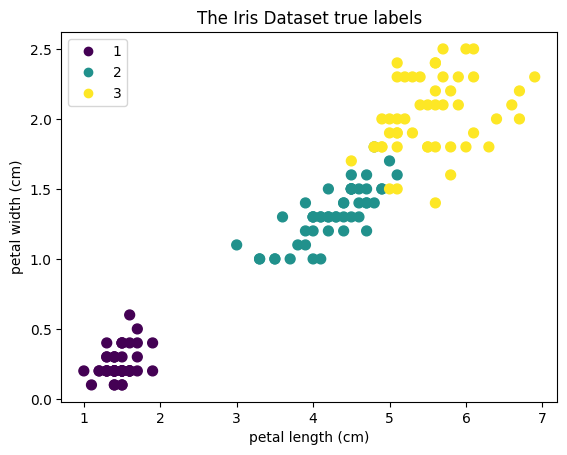

In [828]:
plotData(data, trueLabels,featureNames,0,1,"true")

In [829]:
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, test_size = 0.40,stratify=trueLabels)

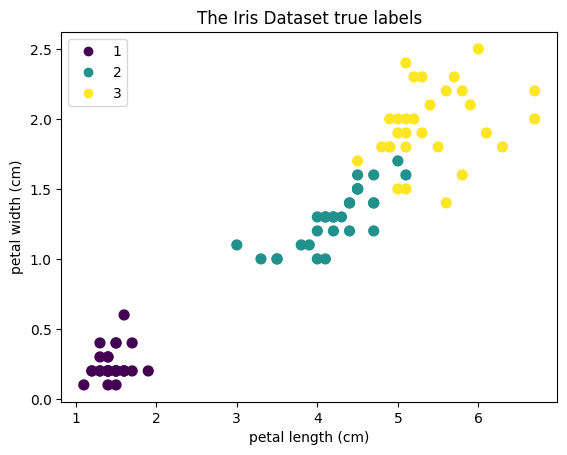

In [830]:
plotData(trainData, trainLabels,featureNames,0,1,"true")

In [831]:
# generate a decision tree
Dtree = tree.DecisionTreeClassifier(max_depth=3)
Dtree.fit(trainData, trainLabels)

DecisionTreeClassifier(max_depth=3)

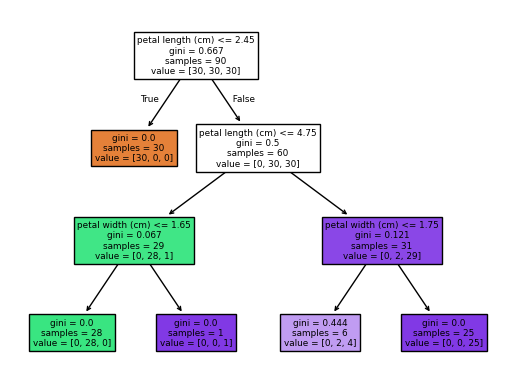

In [832]:
tree.plot_tree(Dtree,feature_names=featureNames,filled=True)
plt.show()

In [833]:
# show a sample prediction
index = 50
sample = testData[index,:].reshape(1,-1)
DtreePredLabel = Dtree.predict(sample)[0]
trueLabel = testLabels[index]
print("sample"+str(index)+"["+str(sample[0][0])+
      ","+str(sample[0][1]) +"] true=" + str(trueLabel) +
      " predicted ="+str(DtreePredLabel))

sample50[6.4,2.0] true=2 predicted =2


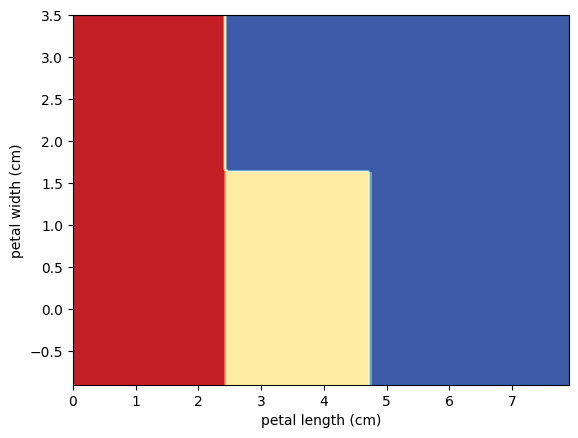

In [834]:
# display tree boundaries
DecisionBoundaryDisplay.from_estimator(Dtree, testData,
        cmap=plt.cm.RdYlBu, response_method="predict",
        xlabel=featureNames[0],ylabel=featureNames[1])

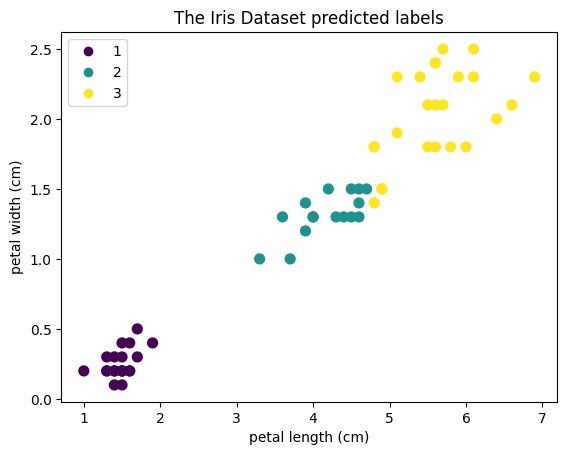

In [835]:
# predict labels
DtreePredLabels = Dtree.predict(testData)
plotData(testData,DtreePredLabels,featureNames,0,1,"predicted")

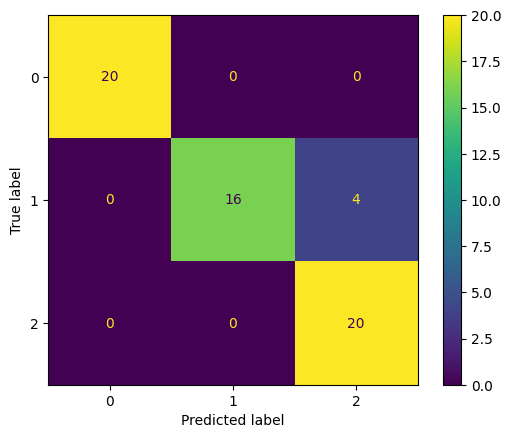

In [836]:
# generate confusion matrix
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [837]:
Rforest = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,        # tree depth
    random_state=None
)

Rforest.fit(trainData,trainLabels)
RforestPredLabels = Rforest.predict(testData)

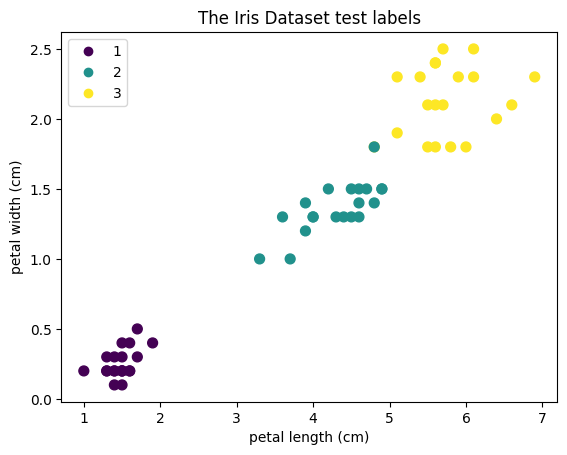

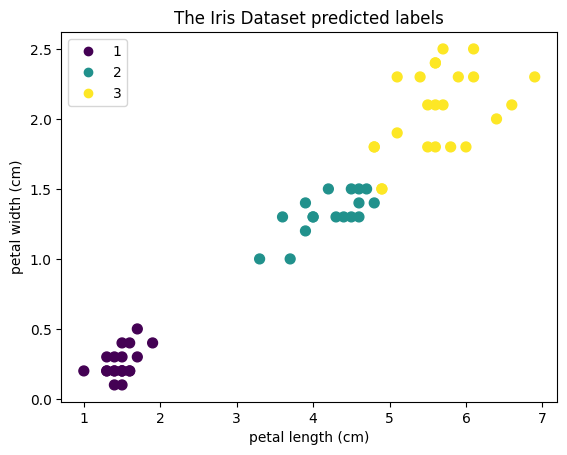

In [838]:
# Plot the predicted results
plotData(testData,testLabels,featureNames,0,1,"test")
plotData(testData,RforestPredLabels,featureNames,0,1,"predicted")

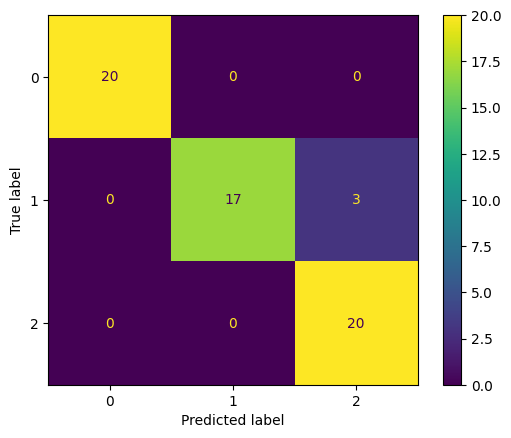

In [839]:
# generate confusion matrix
cm = confusion_matrix(testLabels, RforestPredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [840]:
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, test_size = 0.20,stratify=trueLabels)

In [841]:
Iris = load_iris()
data = Iris.data[:, 2:] # petal length and width
trueLabels = Iris.target
featureNames = Iris.feature_names[2:]

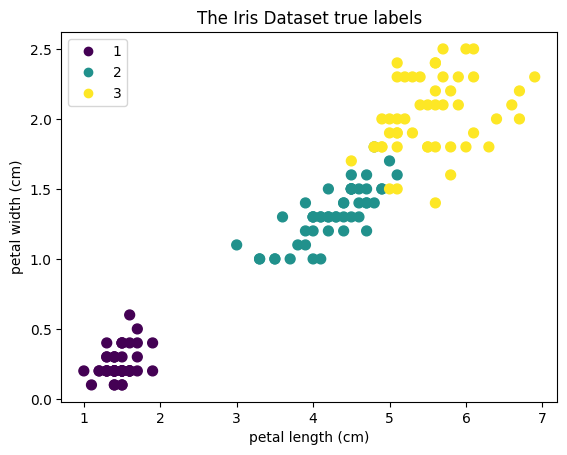

In [842]:
plotData(data, trueLabels,featureNames,0,1,"true")

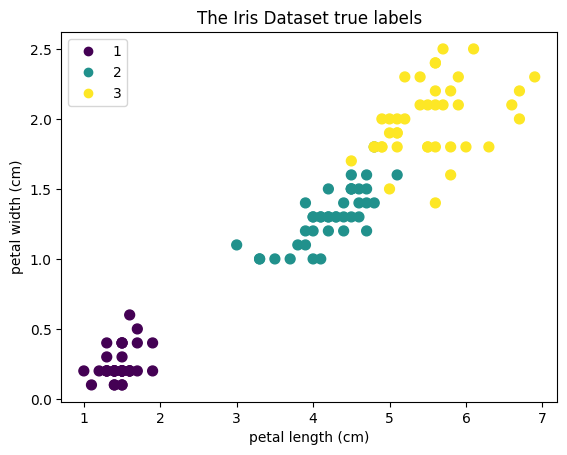

In [843]:
plotData(trainData, trainLabels,featureNames,0,1,"true")

In [844]:
Dtree = tree.DecisionTreeClassifier(max_depth=3)
Dtree.fit(trainData, trainLabels)

DecisionTreeClassifier(max_depth=3)

In [845]:
index1 = 0
index2 = 1

# Sample 1
sample1_data = testData[index1, :]
sample1_true_label = testLabels[index1]
sample1_data_reshaped = sample1_data.reshape(1, -1)
sample1_predicted_label = Dtree.predict(sample1_data_reshaped)[0]

# Sample 2
sample2_data = testData[index2, :]
sample2_true_label = testLabels[index2]
sample2_data_reshaped = sample2_data.reshape(1, -1)
sample2_predicted_label = Dtree.predict(sample2_data_reshaped)[0]

print(f"Sample {index1}:")
print(f"  Data: {sample1_data}")
print(f"  True Label: {sample1_true_label}")
print(f"  Predicted Label: {sample1_predicted_label}")

print(f"\nSample {index2}:")
print(f"  Data: {sample2_data}")
print(f"  True Label: {sample2_true_label}")
print(f"  Predicted Label: {sample2_predicted_label}")

Sample 0:
  Data: [4.9 1.5]
  True Label: 1
  Predicted Label: 2

Sample 1:
  Data: [4.9 1.5]
  True Label: 1
  Predicted Label: 2


In [846]:
def get_decision_path_info(tree_model, sample, feature_names):
    node_indicator = tree_model.decision_path(sample)
    leaf_id = tree_model.apply(sample)

    # Traverse tree_model to find the path
    path_node_indices = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

    print("\nDecision path:")
    for node_id in path_node_indices:
        if leaf_id[0] == node_id:
            continue

        feature = tree_model.tree_.feature[node_id]
        threshold = tree_model.tree_.threshold[node_id]

        if sample[0, feature] <= threshold:
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print(f"  node {node_id}: (X[{feature_names[feature]}] {threshold_sign} {threshold:.2f})")

# Trace decision path for Sample 1
print("\nTracing decision path for Sample 1:")
get_decision_path_info(Dtree, sample1_data_reshaped, featureNames)

# Trace decision path for Sample 2
print("\nTracing decision path for Sample 2:")
get_decision_path_info(Dtree, sample2_data_reshaped, featureNames)


Tracing decision path for Sample 1:

Decision path:
  node 0: (X[petal width (cm)] > 0.80)
  node 2: (X[petal length (cm)] > 4.75)
  node 6: (X[petal length (cm)] > 4.85)

Tracing decision path for Sample 2:

Decision path:
  node 0: (X[petal width (cm)] > 0.80)
  node 2: (X[petal length (cm)] > 4.75)
  node 6: (X[petal length (cm)] > 4.85)


In [847]:
def calculate_gain(tree_model, node_id, feature_names):
    # Get Gini impurity of the father node
    uFather = tree_model.tree_.impurity[node_id]

    # Get left and right children nodes
    left_child = tree_model.tree_.children_left[node_id]
    right_child = tree_model.tree_.children_right[node_id]

    # If it's a leaf node, there's no split and no gain
    if left_child == -1 and right_child == -1:
        print(f"Node {node_id} is a leaf node, no split gain to calculate.")
        return

    # Get Gini impurity of children nodes
    uL = tree_model.tree_.impurity[left_child]
    uR = tree_model.tree_.impurity[right_child]

    # Get number of samples in father and children nodes
    nFather = tree_model.tree_.n_node_samples[node_id]
    nL = tree_model.tree_.n_node_samples[left_child]
    nR = tree_model.tree_.n_node_samples[right_child]

    # Calculate proportion of samples going left and right
    pL = nL / nFather
    pR = nR / nFather

    # Calculate Gain
    gain = uFather - (pL * uL + pR * uR)

    feature = tree_model.tree_.feature[node_id]
    threshold = tree_model.tree_.threshold[node_id]

    print(f"\n--- Node {node_id} ---")
    print(f"  Split condition: {feature_names[feature]} <= {threshold:.2f}")
    print(f"  Gini (Father, uFather): {uFather:.4f}")
    print(f"  Samples (Father): {nFather}")
    print(f"  Gini (Left Child, uL): {uL:.4f}")
    print(f"  Samples (Left Child): {nL}")
    print(f"  Proportion (Left Child, pL): {pL:.4f}")
    print(f"  Gini (Right Child, uR): {uR:.4f}")
    print(f"  Samples (Right Child): {nR}")
    print(f"  Proportion (Right Child, pR): {pR:.4f}")
    print(f"  Calculated Gain: {gain:.4f}")

# Choose two nodes to analyze (e.g., root node 0 and node 1 or 2)
node_to_analyze_1 = 0
node_to_analyze_2 = 2 # Assuming node 2 exists and is not a leaf

print(f"Calculating uncertainty gain for Node {node_to_analyze_1}:")
calculate_gain(Dtree, node_to_analyze_1, featureNames)

print(f"\nCalculating uncertainty gain for Node {node_to_analyze_2}:")
calculate_gain(Dtree, node_to_analyze_2, featureNames)


Calculating uncertainty gain for Node 0:

--- Node 0 ---
  Split condition: petal width (cm) <= 0.80
  Gini (Father, uFather): 0.6667
  Samples (Father): 120
  Gini (Left Child, uL): 0.0000
  Samples (Left Child): 40
  Proportion (Left Child, pL): 0.3333
  Gini (Right Child, uR): 0.5000
  Samples (Right Child): 80
  Proportion (Right Child, pR): 0.6667
  Calculated Gain: 0.3333

Calculating uncertainty gain for Node 2:

--- Node 2 ---
  Split condition: petal length (cm) <= 4.75
  Gini (Father, uFather): 0.5000
  Samples (Father): 80
  Gini (Left Child, uL): 0.0512
  Samples (Left Child): 38
  Proportion (Left Child, pL): 0.4750
  Gini (Right Child, uR): 0.1327
  Samples (Right Child): 42
  Proportion (Right Child, pR): 0.5250
  Calculated Gain: 0.4060


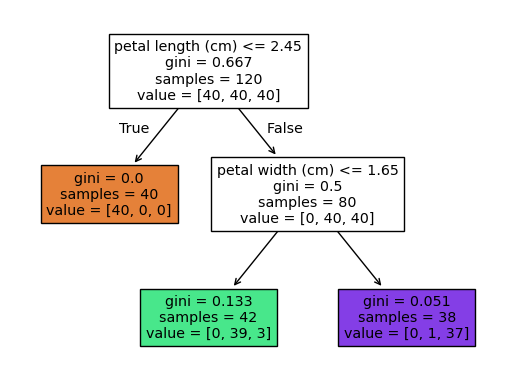

In [848]:
Dtree = tree.DecisionTreeClassifier(max_depth=2)
Dtree.fit(trainData, trainLabels)
tree.plot_tree(Dtree,feature_names=featureNames,filled=True)
plt.show()

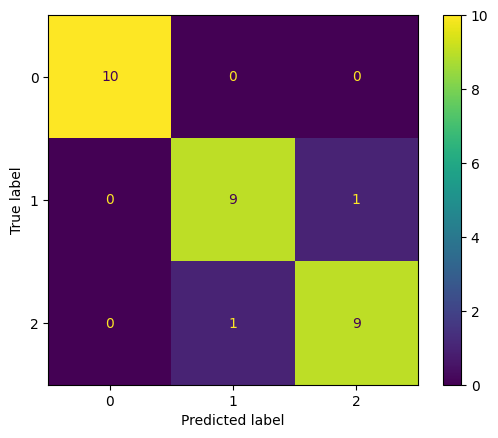

In [849]:
DtreePredLabels = Dtree.predict(testData)
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

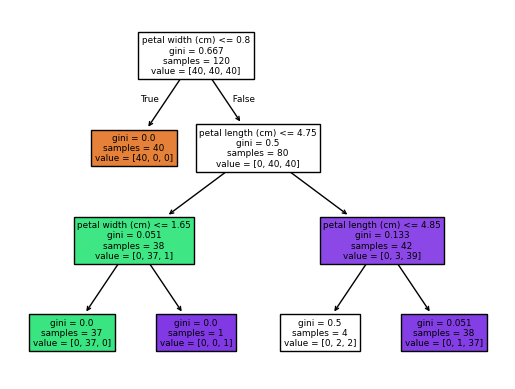

In [850]:
Dtree = tree.DecisionTreeClassifier(max_depth=3)
Dtree.fit(trainData, trainLabels)
tree.plot_tree(Dtree,feature_names=featureNames,filled=True)
plt.show()

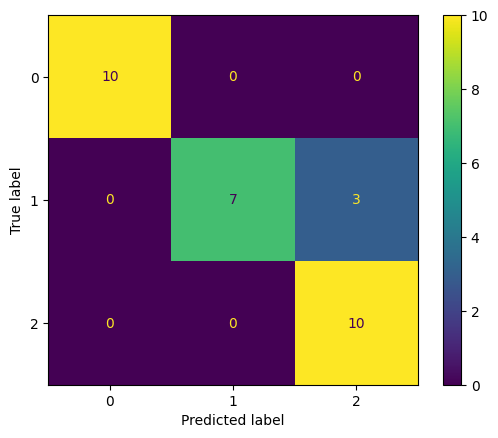

In [851]:
DtreePredLabels = Dtree.predict(testData)
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

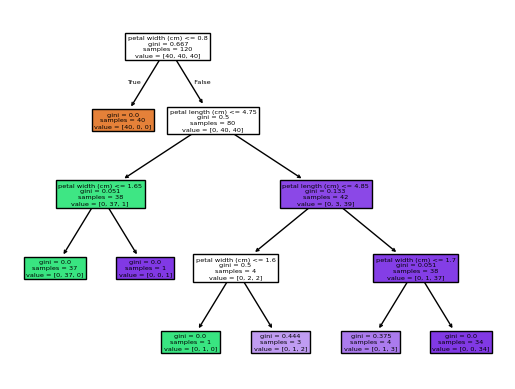

In [852]:
Dtree = tree.DecisionTreeClassifier(max_depth=4)
Dtree.fit(trainData, trainLabels)
tree.plot_tree(Dtree,feature_names=featureNames,filled=True)
plt.show()

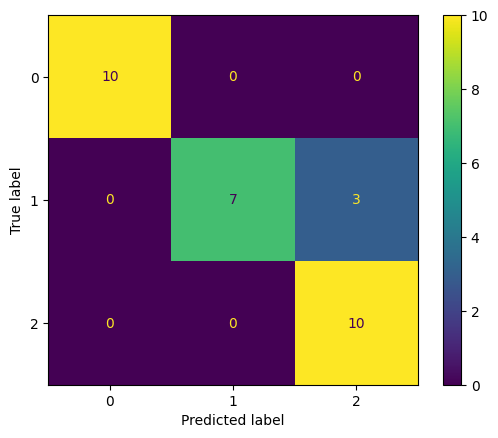

In [853]:
DtreePredLabels = Dtree.predict(testData)
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [854]:
Iris = load_iris()
data = Iris.data[:, :2] # sepal length and width
trueLabels = Iris.target
featureNames = Iris.feature_names[:2]

In [855]:
trainData, testData, trainLabels, testLabels = train_test_split(
    data, trueLabels, test_size = 0.20, stratify=trueLabels)

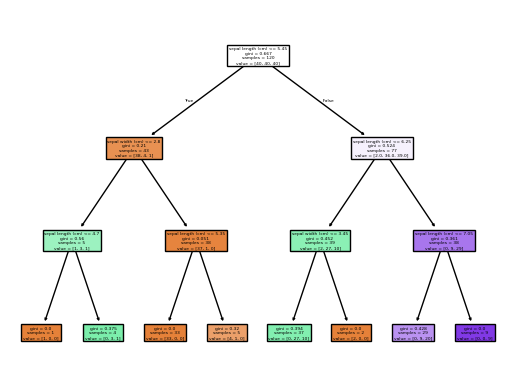

In [856]:
Dtree = tree.DecisionTreeClassifier(max_depth=3)
Dtree.fit(trainData, trainLabels)
tree.plot_tree(Dtree, feature_names=featureNames, filled=True)
plt.show()

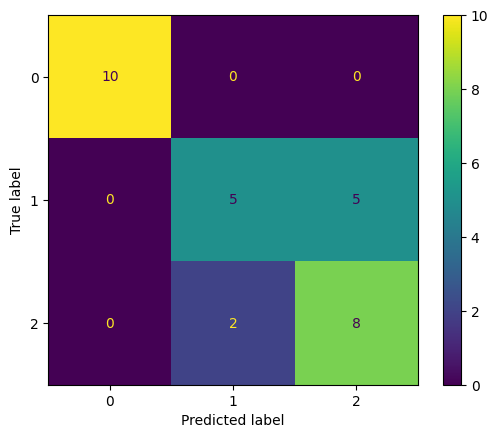

In [857]:
DtreePredLabels = Dtree.predict(testData)
cm = confusion_matrix(testLabels, DtreePredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [858]:
cm_sepal = cm

# Recreate the petal-based Decision Tree and its confusion matrix
Iris_petal = load_iris()
data_petal = Iris_petal.data[:, 2:] # petal length and width
trueLabels_petal = Iris_petal.target
featureNames_petal = Iris_petal.feature_names[2:]

trainData_petal, testData_petal, trainLabels_petal, testLabels_petal = train_test_split(
    data_petal, trueLabels_petal, test_size = 0.20,stratify=trueLabels_petal)

Dtree_petal = tree.DecisionTreeClassifier(max_depth=3)
Dtree_petal.fit(trainData_petal, trainLabels_petal)
DtreePredLabels_petal = Dtree_petal.predict(testData_petal)
cm_petal = confusion_matrix(testLabels_petal, DtreePredLabels_petal)

print("Confusion Matrix for Sepal Features (max_depth=3):")
print(cm_sepal)
print("\nConfusion Matrix for Petal Features (max_depth=3):")
print(cm_petal)

Confusion Matrix for Sepal Features (max_depth=3):
[[10  0  0]
 [ 0  5  5]
 [ 0  2  8]]

Confusion Matrix for Petal Features (max_depth=3):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [859]:
Rforest_sepal = RandomForestClassifier()
Rforest_sepal.fit(trainData, trainLabels)

RandomForestClassifier()

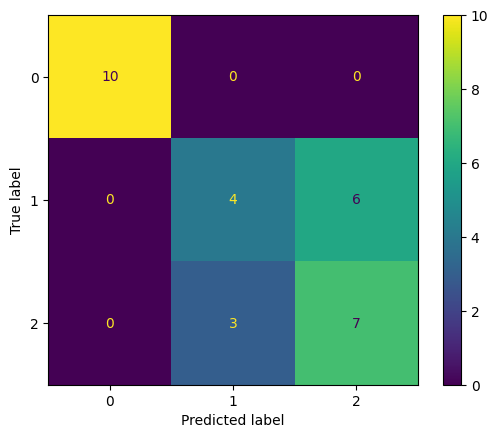

In [860]:
Rforest_sepal_PredLabels = Rforest_sepal.predict(testData)
cm_rforest_sepal = confusion_matrix(testLabels, Rforest_sepal_PredLabels)
ConfusionMatrixDisplay(confusion_matrix=cm_rforest_sepal).plot()

In [861]:
print("Confusion Matrix for Decision Tree (Sepal Features, max_depth=3):\n", cm_sepal)
print("\nConfusion Matrix for Random Forest (Sepal Features):\n", cm_rforest_sepal)

Confusion Matrix for Decision Tree (Sepal Features, max_depth=3):
 [[10  0  0]
 [ 0  5  5]
 [ 0  2  8]]

Confusion Matrix for Random Forest (Sepal Features):
 [[10  0  0]
 [ 0  4  6]
 [ 0  3  7]]
